In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./GlossBERT/Training_Corpora/SemCor/semcor.csv", delimiter="\t", header=0)

In [3]:
print(f"Unique sentences: {len(df.sentence.unique())}")

Unique sentences: 36216


In [4]:
print(f"Unique word senses: {len(df.sense_key.unique())}")

Unique word senses: 33316


In [5]:
print(f"Unique words: {len(df.target_lemma.unique())}")

Unique words: 20399


<AxesSubplot:xlabel='target_pos', ylabel='count'>

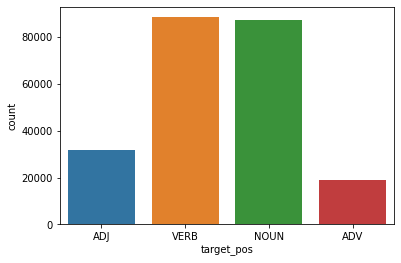

In [6]:
import seaborn as sns

sns.countplot(x='target_pos', data=df)

In [7]:
from nltk.corpus import wordnet as wn

In [8]:
df.head(50)

,sentence,target_index_start,target_index_end,target_id,target_lemma,target_pos,sense_key
0,How long has it been since you reviewed the ob...,1,2,d000.s000.t000,long,ADJ,long%3:00:02::
1,How long has it been since you reviewed the ob...,4,5,d000.s000.t001,be,VERB,be%2:42:03::
2,How long has it been since you reviewed the ob...,7,8,d000.s000.t002,review,VERB,review%2:31:00::
3,How long has it been since you reviewed the ob...,9,10,d000.s000.t003,objective,NOUN,objective%1:09:00::
4,How long has it been since you reviewed the ob...,12,13,d000.s000.t004,benefit,NOUN,benefit%1:21:00::
5,How long has it been since you reviewed the ob...,14,15,d000.s000.t005,service,NOUN,service%1:04:07::
6,How long has it been since you reviewed the ob...,15,16,d000.s000.t006,program,NOUN,program%1:09:01::
7,Have you permitted it to become a giveaway pro...,2,3,d000.s001.t000,permit,VERB,permit%2:41:00::
8,Have you permitted it to become a giveaway pro...,5,6,d000.s001.t001,become,VERB,become%2:42:01::
9,Have you permitted it to become a giveaway pro...,7,8,d000.s001.t002,giveaway,NOUN,giveaway%1:21:00::


In [14]:
ex_1 = df.iloc[29, :]
print(ex_1.sentence)
sense_def = wn.synset_from_sense_key(ex_1.sense_key).definition()
print(f"Sense definition: {sense_def}")
# I don't think this is the correct sense of 'grievance'

Do you measure its relation to reduced absenteeism , turnover , accidents , and grievances , and to improved quality and output ?
Sense definition: an unfortunate mishap; especially one causing damage or injury


In [51]:
lemma = 'erupt'

print(f"Lemma - {lemma}")
for i, g in df[df.target_lemma == lemma].groupby('sense_key'):
    sense_key = g.sense_key.iloc[0]
    synset = wn.synset_from_sense_key(sense_key)
    definition = synset.definition()
    examples = [x for x in synset.examples() if lemma in x]
    print(f"- Sense: {definition}")
    print('- WSD annotated sentences')
    for i, row in g.iterrows():
        print(row.sentence)
    if len(examples) > 0:
        print('- WN Examples')
    for ex in examples:
        print(ex)
    print('                 ')
print("------------------------------")

Lemma - erupt
- Sense: become active and spew forth lava and rocks
- WSD annotated sentences
One of the wagons erupted a massive pillar of flame .
- WN Examples
Vesuvius erupts once in a while
                 
- Sense: start abruptly
- WSD annotated sentences
A bevy of interlacing lagers , work camps , concentration camps erupted in the area .
Presently the well-armed members of the Force Publique - many of them drawn from savage and even cannibalistic tribes , erupted in mutiny , rioting , raping and looting .
It is not a tool for dealing with these crises after they have erupted .
The Kennedy administration moves haltingly toward a Geneva conference on Laos just as serious debate over its foreign policy erupts for the first time .
A truth-revealing crisis erupted in Katanga for a couple of days this month , to be quickly smothered by the high pressure verbal fog that is kept on tap for such emergencies .
That was something of an understatement in a week when the underlying conflict 